In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey.csv


In [16]:
df = pd.read_csv('survey.csv', sep=';')
df.columns = [
    'id', 'degree', 'faculty', 'department', 'specialty', 'course_num',
    'study_lang', 'survey_lang', 'satisfaction', 'choose_again',
    'interest', 'school_knowledge', 'skills', 'values', 'grant_impact', 'course_label', 'gender'
]


mapping = {'Очень важно': 5, 'Важно': 4, 'Средне важно': 3, 'Маловажно': 2, 'Не важно': 1}
factor_cols = ['interest', 'school_knowledge', 'skills', 'values']

for col in factor_cols:
    df[col + '_score'] = df[col].map(mapping)


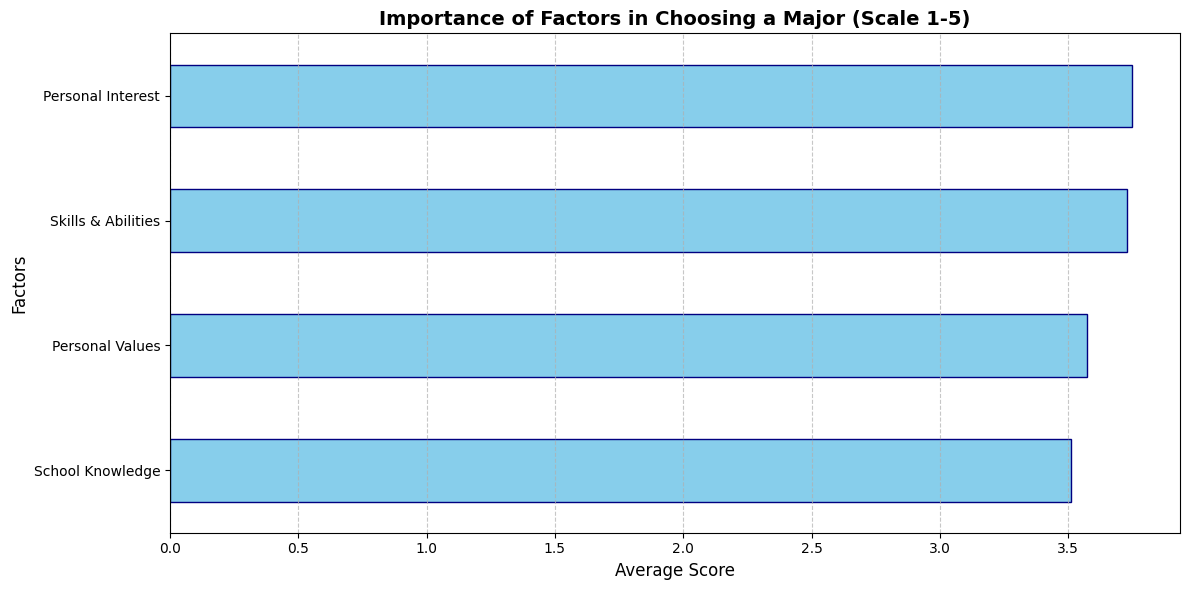

In [17]:
plt.figure(figsize=(12, 6))
factor_means = df[[c + '_score' for c in factor_cols]].mean().sort_values()
factor_means.index = [
    'School Knowledge',
    'Personal Values',
    'Skills & Abilities',
    'Personal Interest'
]

factor_means.plot(kind='barh', color='skyblue', edgecolor='navy')
plt.title('Importance of Factors in Choosing a Major (Scale 1-5)', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Factors', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1797305571.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yes', 'No', 'Undecided'])


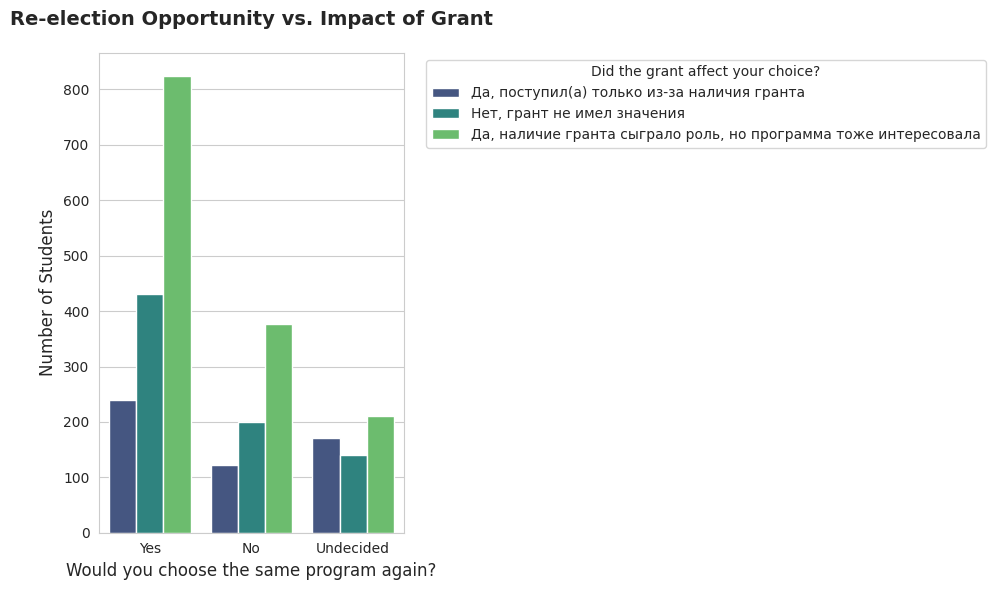

In [18]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(data=df, x='choose_again', hue='grant_impact', palette='viridis')
plt.title('Re-election Opportunity vs. Impact of Grant', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Would you choose the same program again?', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title='Did the grant affect your choice?', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(['Yes', 'No', 'Undecided'])

plt.tight_layout()
plt.show()

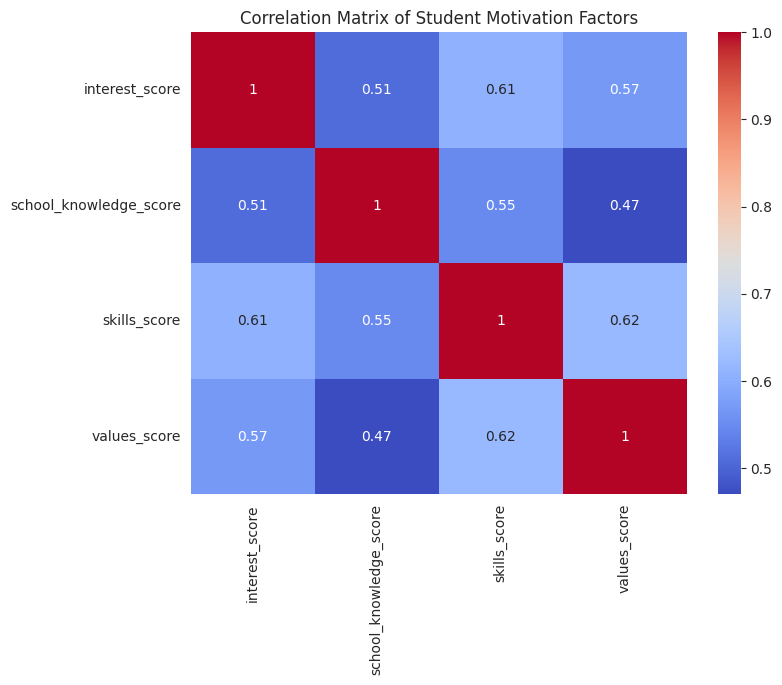

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[[c + '_score' for c in factor_cols]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Student Motivation Factors')
plt.show()

In [20]:
df = pd.read_csv('survey.csv', sep=';')
df.columns = ['id', 'degree', 'faculty', 'dept', 'spec', 'course', 'lang', 'survey_lang',
              'satisfaction', 'choose_again', 'interest', 'school', 'skills', 'values', 'grant', 'label', 'gender']

sat_map = {'Полностью удовлетворён': 5, 'Скорее удовлетворён': 4, 'Ни да, ни нет': 3,
           'Скорее не удовлетворён': 2, 'Совсем не удовлетворён': 1}
df['sat_score'] = df['satisfaction'].map(sat_map)


/tmp/ipython-input-239290398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


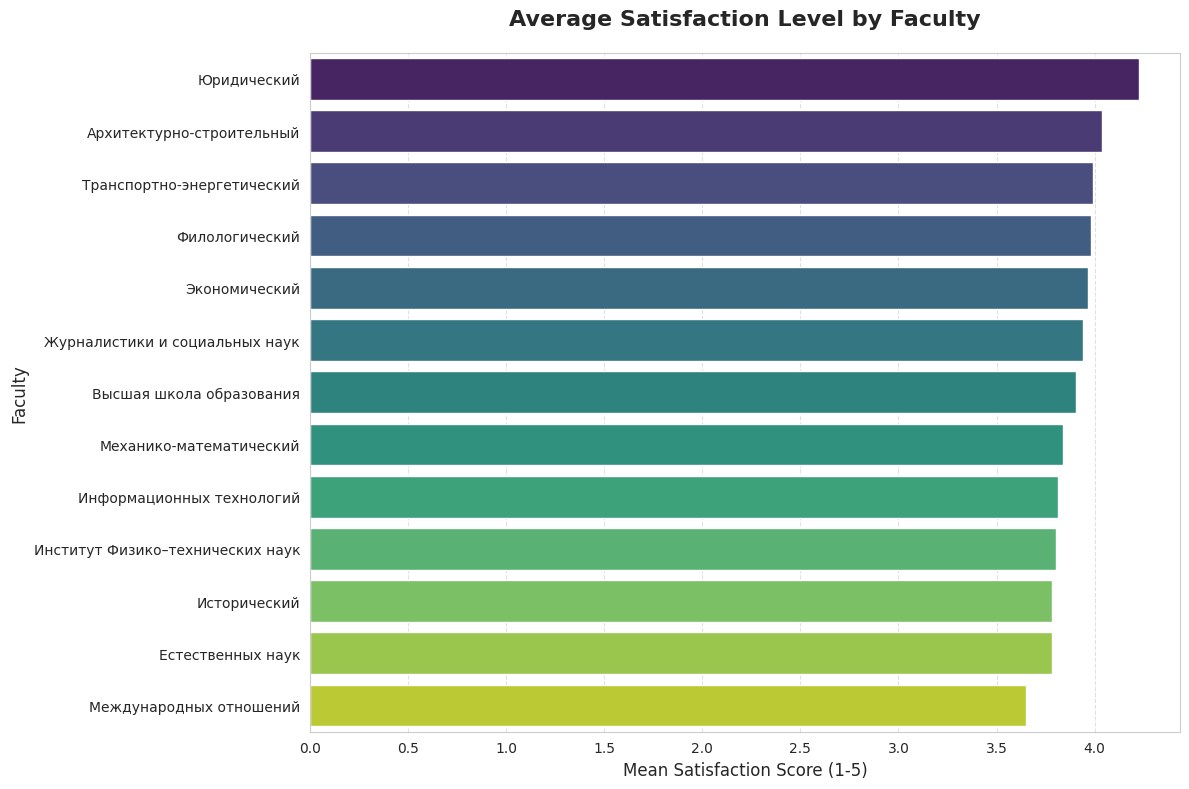

In [21]:
faculty_order = df.groupby('faculty')['sat_score'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df,
    x='sat_score',
    y='faculty',
    order=faculty_order,
    estimator='mean',
    palette='viridis',
    errorbar=None
)

plt.title('Average Satisfaction Level by Faculty', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mean Satisfaction Score (1-5)', fontsize=12)
plt.ylabel('Faculty', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

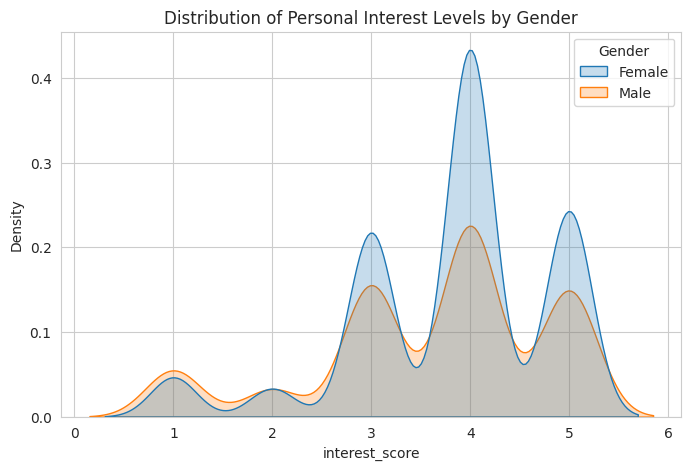

In [22]:
mapping = {'Очень важно': 5, 'Важно': 4, 'Средне важно': 3, 'Маловажно': 2, 'Не важно': 1, 'Затрудняюсь ответить': 0}
df['interest_score'] = df['interest'].map(mapping)

df['Gender'] = df['gender'].replace({'Мужской': 'Male', 'Женский': 'Female'})
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='interest_score', hue='Gender', fill=True)
plt.title('Distribution of Personal Interest Levels by Gender')
plt.show()

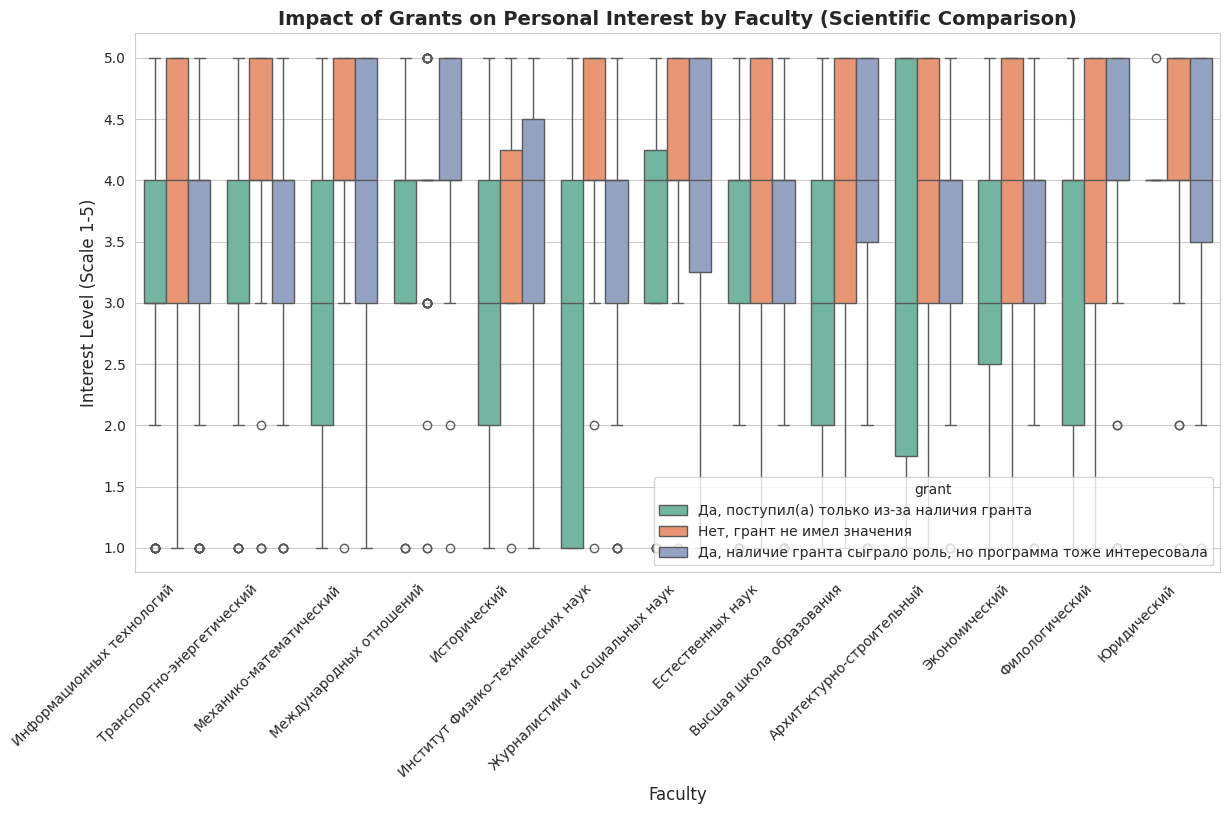

In [34]:
df = pd.read_csv('survey.csv', sep=';')
df.columns = ['id', 'degree', 'faculty', 'dept', 'spec', 'course', 'lang', 'survey_lang',
              'satisfaction', 'choose_again', 'interest', 'school', 'skills', 'values', 'grant', 'label', 'gender']

score_map = {'Очень важно': 5, 'Важно': 4, 'Средне важно': 3, 'Маловажно': 2, 'Не важно': 1, 'Затрудняюсь ответить': 0}
for col in ['interest', 'school', 'skills', 'values']:
    df[col + '_val'] = df[col].map(score_map)

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='faculty', y='interest_val', hue='grant', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Impact of Grants on Personal Interest by Faculty (Scientific Comparison)', fontsize=14, fontweight='bold')
plt.ylabel('Interest Level (Scale 1-5)', fontsize=12)
plt.xlabel('Faculty', fontsize=12)
plt.show()


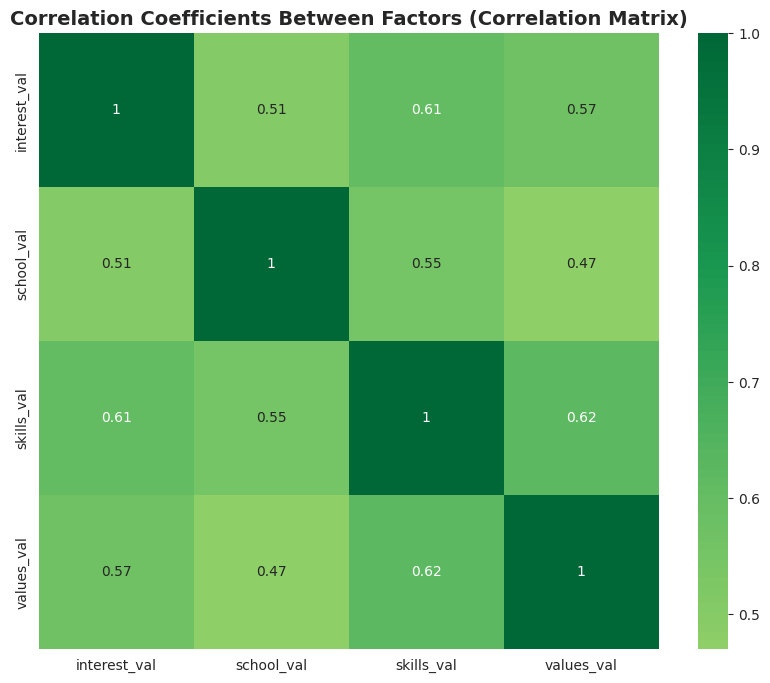

In [38]:
plt.figure(figsize=(10, 8))
corr = df[['interest_val', 'school_val', 'skills_val', 'values_val']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Coefficients Between Factors (Correlation Matrix)', fontsize=14, fontweight='bold')
plt.show()

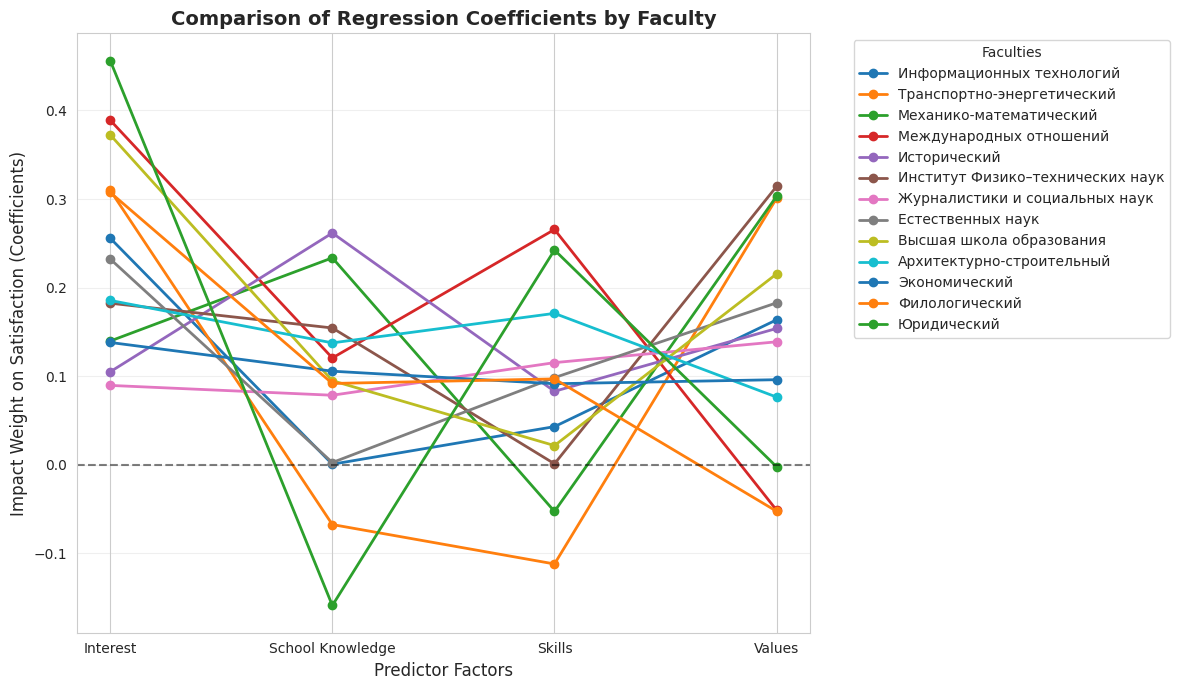

In [40]:
df.columns = [col.strip().replace('\n', ' ') for col in df.columns]

rename_dict = {
    df.columns[2]: 'faculty',
    df.columns[8]: 'sat_score',
    df.columns[10]: 'interest',
    df.columns[11]: 'school_knowledge',
    df.columns[12]: 'skills',
    df.columns[13]: 'values'
}
df = df.rename(columns=rename_dict)


mapping = {
    'Очень важно': 5, 'Важно': 4, 'Средне важно': 3,
    'Маловажно': 2, 'Не важно': 1, 'Затрудняюсь ответить': 0,
    'Полностью удовлетворён': 5, 'Скорее удовлетворён': 4,
    'Ни да, ни нет': 3, 'Скорее не удовлетворён': 2, 'Совсем не удовлетворён': 1
}


score_cols = []
for col in ['interest', 'school_knowledge', 'skills', 'values', 'sat_score']:
    new_col_name = col + '_score'
    df[new_col_name] = df[col].map(mapping).fillna(0)
    if col != 'sat_score':
        score_cols.append(new_col_name)

faculties = df['faculty'].dropna().unique()
plt.figure(figsize=(12, 7))


feature_cols = ['interest_score', 'school_knowledge_score', 'skills_score', 'values_score']
display_names = ['Interest', 'School Knowledge', 'Skills', 'Values']

for faculty in faculties:
    sub_df = df[df['faculty'] == faculty].copy()
    sub_df = sub_df.dropna(subset=feature_cols + ['sat_score_score'])

    if len(sub_df) > 10:
        X = sub_df[feature_cols]
        y = sub_df['sat_score_score']

        model = LinearRegression()
        model.fit(X, y)

        plt.plot(display_names, model.coef_, marker='o', label=faculty, linewidth=2)

plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Comparison of Regression Coefficients by Faculty', fontsize=14, fontweight='bold')
plt.xlabel('Predictor Factors', fontsize=12)
plt.ylabel('Impact Weight on Satisfaction (Coefficients)', fontsize=12)

plt.legend(title='Faculties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

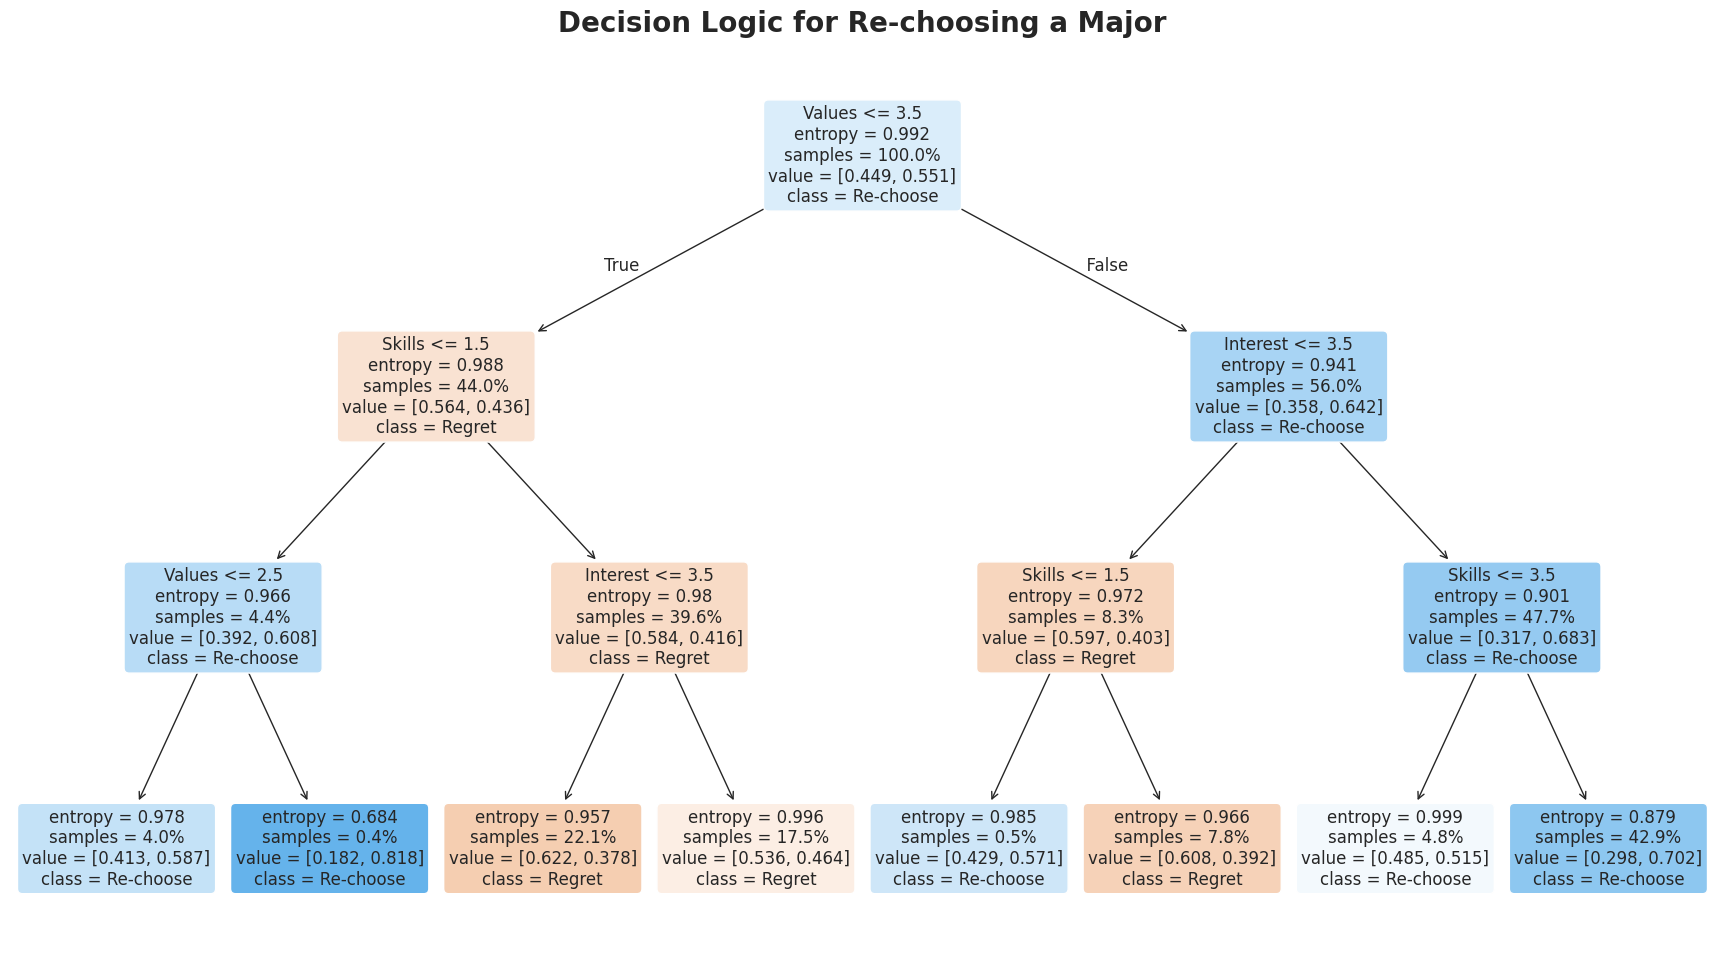

Decision Tree Rules:
 |--- Values <= 3.50
|   |--- Skills <= 1.50
|   |   |--- Values <= 2.50
|   |   |   |--- class: 1
|   |   |--- Values >  2.50
|   |   |   |--- class: 1
|   |--- Skills >  1.50
|   |   |--- Interest <= 3.50
|   |   |   |--- class: 0
|   |   |--- Interest >  3.50
|   |   |   |--- class: 0
|--- Values >  3.50
|   |--- Interest <= 3.50
|   |   |--- Skills <= 1.50
|   |   |   |--- class: 1
|   |   |--- Skills >  1.50
|   |   |   |--- class: 0
|   |--- Interest >  3.50
|   |   |--- Skills <= 3.50
|   |   |   |--- class: 1
|   |   |--- Skills >  3.50
|   |   |   |--- class: 1



In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

df['re_choose'] = df['choose_again'].apply(lambda x: 1 if 'Да' in str(x).strip() else 0)
X = df[['interest_score', 'skills_score', 'values_score']]
X.columns = ['Interest', 'Skills', 'Values']
y = df['re_choose']

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf.fit(X, y)

plt.figure(figsize=(22, 12), dpi=100)
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Regret', 'Re-choose'],
          filled=True,
          rounded=True,
          fontsize=12,
          proportion=True)

plt.title('Decision Logic for Re-choosing a Major', fontsize=20, fontweight='bold')
plt.show()
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)